# Assignment 2: Build a CNN for image recognition.
### Name: [PREMAL DOSHI]
- Turn in solutions as a single notebook (ipynb) and as a pdf on Canvas. No need to turn in datasets/word-docs.
-	Make sure to clearly and add comments to make your code readable.
-	You are allowed to discuss with other students (up to three) or the instructor. Please put all the names of students that you discussed with. However individual students must write their own solutions.
-	Copying a program, or letting someone else copy your program, is a form of academic dishonesty.
- Any referred material must be cited properly.
-	Maximally leverage Piazza to benefit other students by your questions and answers.
-	Try to be updated by checking notifications in both Piazza and Canvas class webpage.

## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accurcy.

## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then submit IPython Notebook to Canvas.

- Also keep in mind that the IPYNB files must contain the outputs. (Otherwise, the teaching staff will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [1]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [2]:
import numpy as np
def to_one_hot(y, num_classes=10):
    y = y.flatten().astype(int)
    # Initialize an array of zeros with shape n x num_classes
    one_hot = np.zeros((y.shape[0], num_classes))
    # Set the appropriate element to 1 for each label
    one_hot[np.arange(y.shape[0]), y] = 1
    return one_hot

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [3]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


# Data Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Create a data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,     # Random rotation degrees
    width_shift_range=0.1, # Random horizontal shift
    height_shift_range=0.1,# Random vertical shift
    horizontal_flip=True,  # Random horizontal flip
    zoom_range=0.1         # Random zoom
)


In [7]:
datagen.fit(x_tr)

## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * **Do NOT use test data for hyper-parameter tuning!!!**
3. Try to achieve a validation accuracy as high as possible.

### Remark:

The following CNN is just an naive example. You are supposed to make ***substantial improvements*** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

# About the CNN model used: 
#### This Keras model is a **Convolutional Neural Network (CNN)** designed for image classification, with hyperparameters that can be tuned using Keras Tuner. Here's a concise explanation:

1. **Architecture**: 
   - The model has two **convolutional blocks** with varying filter sizes and dropout rates. Each block contains two **Conv2D layers** (for feature extraction), followed by **BatchNormalization** (for faster and stable training), **MaxPooling** (for down-sampling), and **Dropout** (to prevent overfitting).
   
2. **Hyperparameters**: 
   - The number of filters in the first and second Conv blocks (`conv1_filters`, `conv2_filters`), dropout rates (`dropout1`, `dropout2`, `dropout3`), and the number of units in the **Dense** layer are hyperparameters optimized using Keras Tuner.
   - The **learning rate** of the **Adam** optimizer is also tuned.

3. **Final Layers**: 
   - The model flattens the feature maps and passes them through a **Dense layer**, followed by a **softmax output** layer for multi-class classification.

4. **Loss and Metrics**: 
   - The model uses **categorical crossentropy** as the loss function and **accuracy** as the evaluation metric.

In [8]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


# Define a model building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # First Conv block
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32), 
        kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32), 
        kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout1', 0.25, 0.5, step=0.05)))

    # Second Conv block
    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=64), 
        kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=64), 
        kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout2', 0.25, 0.5, step=0.05)))

    # Flatten and Fully Connected layer
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', min_value=128, max_value=512, step=128)))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout3', 0.25, 0.5, step=0.05)))
    model.add(Dense(10, activation='softmax'))  # Output layer

    # Compile the model with hyperparameters
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model


## Searching for the best hyper parameters

In [9]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
# Create a tuner object
tuner = kt.Hyperband(
    build_model,                      # The model-building function
    objective='val_accuracy',          # Objective to optimize
    max_epochs=20,                     # Max number of epochs
    factor=3,                          # Hyperband factor
    directory='hyperband_dir',         # Directory to save logs
    project_name='cifar10_tuning'      # Project name for logs
)

# Early stopping to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Perform the hyperparameter search
tuner.search(x_tr, y_tr, epochs=20, validation_data=(x_val, y_val), callbacks=[stop_early])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the optimal hyperparameters
print(f"""
The hyperparameter search is complete. The optimal number of filters in the first conv layer is {best_hps.get('conv1_filters')},
the optimal number of filters in the second conv layer is {best_hps.get('conv2_filters')}, 
and the best dense layer size is {best_hps.get('dense_units')}.
The best learning rate is {best_hps.get('lr')}.
""")

Trial 30 Complete [00h 41m 26s]
val_accuracy: 0.6908000111579895

Best val_accuracy So Far: 0.7179999947547913
Total elapsed time: 1d 01h 32m 47s

The hyperparameter search is complete. The optimal number of filters in the first conv layer is 64,
the optimal number of filters in the second conv layer is 256, 
and the best dense layer size is 384.
The best learning rate is 0.0014711547097274132.



# Using the best hyperparameters with data augmentation

In [5]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow as tf


# Create a data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,     # Random rotation degrees
    width_shift_range=0.1, # Random horizontal shift
    height_shift_range=0.1,# Random vertical shift
    horizontal_flip=True,  # Random horizontal flip
    zoom_range=0.1         # Random zoom
)

# Fit the generator to the training data
datagen.fit(x_tr)

# Define the model using the best hyperparameters
model = Sequential()

# First Conv block with optimal filters
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Second Conv block with optimal filters
model.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten and Fully Connected layer with optimal dense units
model.add(Flatten())
model.add(Dense(384, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))  # Output layer


In [6]:

# Compile the model with the best learning rate
optimizer = Adam(learning_rate=0.0014711547097274132)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model using the data augmentation generator
history = model.fit(datagen.flow(x_tr, y_tr, batch_size=64),
                    epochs=30, validation_data=(x_val, y_val),
                    callbacks=[early_stopping])


Epoch 1/30
625/625 [==============================] - 470s 748ms/step - loss: 1.7994 - accuracy: 0.3879 - val_loss: 1.8622 - val_accuracy: 0.4277
Epoch 2/30
625/625 [==============================] - 488s 782ms/step - loss: 1.3975 - accuracy: 0.5079 - val_loss: 1.3321 - val_accuracy: 0.5417
Epoch 3/30
625/625 [==============================] - 637s 1s/step - loss: 1.2619 - accuracy: 0.5533 - val_loss: 1.3395 - val_accuracy: 0.5699
Epoch 4/30
625/625 [==============================] - 566s 906ms/step - loss: 1.1891 - accuracy: 0.5835 - val_loss: 1.3292 - val_accuracy: 0.5712
Epoch 5/30
625/625 [==============================] - 660s 1s/step - loss: 1.1312 - accuracy: 0.6053 - val_loss: 1.3682 - val_accuracy: 0.6021
Epoch 6/30
625/625 [==============================] - 564s 902ms/step - loss: 1.0937 - accuracy: 0.6175 - val_loss: 1.1808 - val_accuracy: 0.6215
Epoch 7/30
625/625 [==============================] - 515s 824ms/step - loss: 1.0603 - accuracy: 0.6306 - val_loss: 0.9260 - val_a

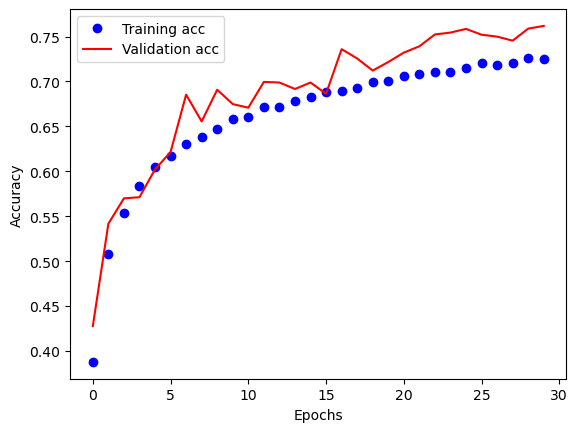

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters.
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [8]:
# <Compile your model again (using the same hyper-parameters)>

optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [9]:
# <Train your model on the entire training set (50K samples)>
# <Use (x_train, y_train_vec) instead of (x_tr, y_tr)>
# <Do NOT use the validation_data option (because now you do not have validation data)>

history= model.fit(x_train, y_train_vec, epochs=50, batch_size=64) 

Epoch 1/50
782/782 [==============================] - 575s 733ms/step - loss: 0.6193 - accuracy: 0.7870
Epoch 2/50
782/782 [==============================] - 574s 734ms/step - loss: 0.5631 - accuracy: 0.8050
Epoch 3/50
782/782 [==============================] - 571s 731ms/step - loss: 0.5204 - accuracy: 0.8173
Epoch 4/50
782/782 [==============================] - 577s 738ms/step - loss: 0.4845 - accuracy: 0.8306
Epoch 5/50
782/782 [==============================] - 577s 738ms/step - loss: 0.4498 - accuracy: 0.8434
Epoch 6/50
782/782 [==============================] - 586s 749ms/step - loss: 0.4168 - accuracy: 0.8542
Epoch 7/50
782/782 [==============================] - 576s 737ms/step - loss: 0.3917 - accuracy: 0.8618
Epoch 8/50
782/782 [==============================] - 572s 732ms/step - loss: 0.3747 - accuracy: 0.8689
Epoch 9/50
782/782 [==============================] - 572s 731ms/step - loss: 0.3449 - accuracy: 0.8780
Epoch 10/50
782/782 [==============================] - 591s 756m

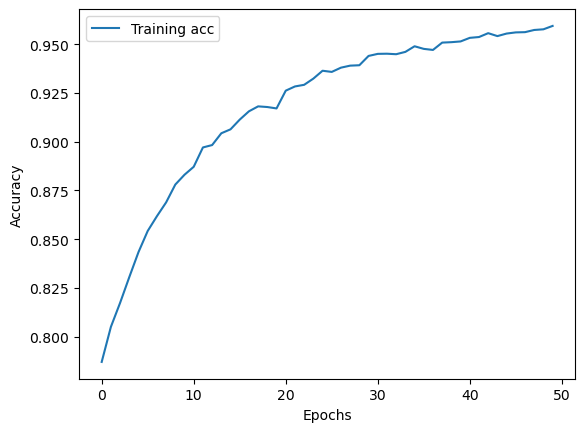

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [10]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 33s 104ms/step - loss: 0.9017 - accuracy: 0.8004
loss = 0.9016519784927368
accuracy = 0.8004000186920166


## Conclusion :

The custom Convolutional Neural Network (CNN) achieved a strong performance on the CIFAR-10 dataset, with a **training accuracy of 95.94%** on 50,000 samples and a **test accuracy of 80.04%** on 10,000 samples. This indicates that the model effectively learned the patterns in the training data, while also generalizing well to unseen test data. However, the difference between training and test accuracy suggests slight overfitting, which could be further addressed with additional regularization techniques or enhanced data augmentation. Overall, the model met the target of achieving over 80% accuracy, demonstrating its effectiveness for image classification tasks on CIFAR-10.